In [1]:
def hi():
    print('hi!')
    print('My name is Megumi')
    
hi()

hi!
My name is Megumi


In [2]:
def hi2(name, job):
    print('hi!')
    print('My name is', name, 'and My job is', job, '!')
    
hi2(name = '고라니', job = 'programmer')

hi!
My name is 고라니 and My job is programmer !


In [5]:
def plus(num1, num2):
    result = num1 + num2
    return result
    
print(plus(486, 849))

1335


In [7]:
def plus(num1, num2):
    result = num1 + num2
    return result

a, b = int(input('첫 번째 숫자 : ')), int(input('두 번째 숫자 : '))
sum_ab = plus(a, b)
print('두 수의 합 : ', sum_ab)

첫 번째 숫자 : 379
두 번째 숫자 : 184
두 수의 합 :  563


In [8]:
def calculate_score(kor, eng, math):
    score = kor*0.3+eng*0.3+math*0.4
    return score

student1 = calculate_score(99,80,72)
if student1 > 80:
    print('합격입니다. 점수:',student1)
else:    
    print('탈락입니다. 점수:',student1)  

합격입니다. 점수: 82.5


In [9]:
def calculate_score_pass(kor, eng, math):
    score = kor*0.3+eng*0.3+math*0.4
    if score > 80:
        pass_yn = 'yes'
    else:
        pass_yn = 'no'
    return score, pass_yn

stu1_score, stu1_pass = calculate_score_pass(99,80,72)
print('환산점수:', stu1_score, '합격여부:', stu1_pass)

환산점수: 82.5 합격여부: yes


In [10]:
def func1():
    global a, b
    a += 2
    b *= 2
    print(a, b)
    
a ,b = 5, 10
func1()

7 20


In [12]:
def reward_penalty(kind, points):
    global current_point
    print('현재 점수 :', current_point)
    if kind == '상점':
        current_point += points
        print('상점 입력 후 점수 :', current_point)
    elif kind == '벌점':
        current_point -= points
        print('벌점 입력 후 점수 :', current_point)
    return current_point

current_point = 5
reward_penalty('상점', 5)
print('최종 점수 :', current_point)

현재 점수 : 5
상점 입력 후 점수 : 10
최종 점수 : 10


In [13]:
import random

def gugudan(num1, num2):
    answer = int(input(str(num1) + 'x' + str(num2) + '? '))
    
    if answer == num1 * num2:
        return 0
    else:
        print('땡 정답은 ', num1 * num2)
        return -1
    
print('구구단을 외자')
for i in range(20):
    a, b = random.randint(2,9), random.randint(1,9)
    if gugudan(a, b) != 0:
        break

구구단을 외자
9x1? 9
8x5? 8
땡 정답은  40


In [14]:
players = ['까치','강아지','토끼','고양이','참새']

def game_play(name, cnt):
    print(name * cnt)
    
def wrong_play(name, cnt):
    if name not in players:
        print(name, '은 없는 이름입니다.')
        return -1
    if cnt < 1 or cnt > 4:
        print('1~4사이의 숫자만 가능합니다. 입력한 숫자:',cnt)
        return -1
    
print('프라이팬 놀이')

for i in range(5):
    next_player, count = input('이름?'), int(input('횟수?'))
    check = wrong_play(next_player, count)
    if check == -1:
        break
    else:
        game_play(next_player, count)

프라이팬 놀이
이름?까치
횟수?3
까치까치까치
이름?강아지
횟수?2
강아지강아지
이름?해진이
횟수?5
해진이 은 없는 이름입니다.


핫플레이스가 위치한 행정동을 입력하세요 >>압구정동
압구정동 - 11680545 를 분석합니다


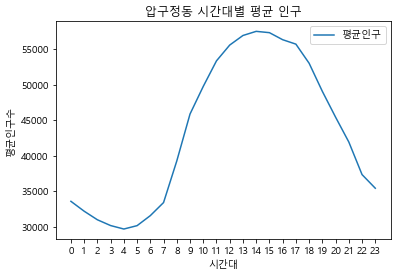

In [15]:
import csv
import matplotlib.pyplot as plt

def file_open():
    # 인구 데이터 파일 읽기
    f = open('LOCAL_PEOPLE_DONG_202205.csv', encoding='utf8')
    data = csv.reader(f)
    next(data)
    data = list(data)
    
    # 행정동 코드 파일 읽기
    f2 = open('dong_code.csv', encoding='utf8')
    code_data = csv.reader(f2)
    next(code_data)
    next(code_data)
    code_data = list(code_data)
    
    # 인구 데이터 자료형 변환 (문자열->정수, 실수)
    for row in data:
        for i in range(1, 32):
            if i <= 2:
                row[i] = int(row[i])
            else:
                row[i] = float(row[i])
                
    # 행정동 코드 데이터 자료형 변환 (문자열->정수)
    for row in code_data:
        row[1] = int(row[1])
        
    return data, code_data

# 행정동 이름과 코드 연결
def dong_search(dong_name):
    for row in code_data:
        if row[-1] == dong_name:
            code = row[1]
    print(dong_name, '-', code, '를 분석합니다')
    return code

# 그래프 그리기
def graph_plot(pop_list, label_list, graph_title):
    plt.rc('font', family='Malgun Gothic')
    plt.title(graph_title)
    for i in range(len(pop_list)):
        plt.plot(range(24), pop_list[i], label=label_list[i])
    plt.legend()
    plt.xlabel('시간대')
    plt.ylabel('평균인구수')
    plt.xticks(range(24), range(24))
    plt.show()
    
# 시간대 별 인구 분석
def analysis1(dong_name, dong_code):
    # 행정동의 평균 인구 구하기
    pop = [0 for i in range(24)]
    for row in data:
        if row[2] == dong_code:
            time, p = row[1], row[3]
            pop[time] += p
    pop = [p/31 for p in pop]
       
    # 평균 인구 리스트로 꺾은 선 그래프 작성
    pop = [pop]
    labels = ['평균인구']
    title = dong_name + ' 시간대별 평균 인구'
    graph_plot(pop_list = pop, label_list = labels, graph_title = title)
    
    

data, code_data = file_open()

input_name = input('핫플레이스가 위치한 행정동을 입력하세요 >>')
input_code = dong_search(input_name)

analysis1(dong_name = input_name, dong_code = input_code)

핫플레이스가 위치한 행정동을 입력하세요 >>압구정동
압구정동 - 11680545 를 분석합니다


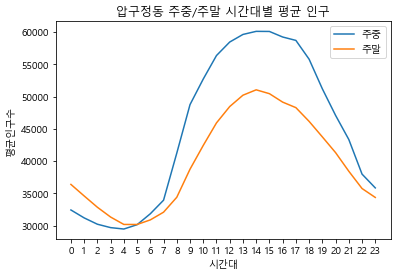

In [17]:
import csv
import matplotlib.pyplot as plt
import datetime

def file_open():
    # 인구 데이터 파일 읽기
    f = open('LOCAL_PEOPLE_DONG_202205.csv', encoding='utf8')
    data = csv.reader(f)
    next(data)
    data = list(data)
    
    # 행정동 코드 파일 읽기
    f2 = open('dong_code.csv', encoding='utf8')
    code_data = csv.reader(f2)
    next(code_data)
    next(code_data)
    code_data = list(code_data)
    
    # 인구 데이터 자료형 변환 (문자열->정수, 실수)
    for row in data:
        for i in range(1, 32):
            if i <= 2:
                row[i] = int(row[i])
            else:
                row[i] = float(row[i])
                
    # 행정동 코드 데이터 자료형 변환 (문자열->정수)
    for row in code_data:
        row[1] = int(row[1])
        
    return data, code_data

# 행정동 이름과 코드 연결
def dong_search(dong_name):
    for row in code_data:
        if row[-1] == dong_name:
            code = row[1]
    print(dong_name, '-', code, '를 분석합니다')
    return code

# 그래프 그리기
def graph_plot(pop_list, label_list, graph_title):
    plt.rc('font', family='Malgun Gothic')
    plt.title(graph_title)
    for i in range(len(pop_list)):
        plt.plot(range(24), pop_list[i], label=label_list[i])
    plt.legend()
    plt.xlabel('시간대')
    plt.ylabel('평균인구수')
    plt.xticks(range(24), range(24))
    plt.show()
    
# 시간대 별 인구 분석
def analysis1(dong_name, dong_code):
    # 행정동의 평균 인구 구하기
    pop = [0 for i in range(24)]
    for row in data:
        if row[2] == dong_code:
            time, p = row[1], row[3]
            pop[time] += p
    pop = [p/31 for p in pop]
    
    # 평균 인구 리스트로 꺾은 선 그래프 작성
    pop = [pop]
    labels = ['평균인구']
    title = dong_name + ' 시간대별 평균 인구'
    graph_plot(pop_list = pop, label_list = labels, graph_title = title)

# 주중/주말 시간대별 인구 분석
def analysis2(dong_name, dong_code):
    weekday = [0 for i in range(24)]
    weekend = [0 for i in range(24)]
    
    for row in data:
        if row[2] == dong_code:
            time, p = row[1], row[3]
            year, mon ,day = int(row[0][:4]), int(row[0][4:6]), int(row[0][6:])
            num = datetime.date(year, mon, day).weekday()
            if num < 5:
                weekday[time] += p
            else:
                weekend[time] += p
                
    weekday_cnt, weekend_cnt = 0, 0
    for i in range(1, 32):
        if datetime.date(2022, 5, i).weekday() < 5:
            weekday_cnt += 1
        else:
            weekend_cnt += 1
            
    weekday = [w/weekday_cnt for w in weekday]
    weekend = [w/weekend_cnt for w in weekend]
    
    # 평균 인구 리스트로 꺾은 선 그래프 작성
    data_set = [weekday, weekend]
    labels = ['주중', '주말']
    title = dong_name + ' 주중/주말 시간대별 평균 인구'
    graph_plot(pop_list=data_set, label_list=labels, graph_title=title)

data, code_data = file_open()

input_name = input('핫플레이스가 위치한 행정동을 입력하세요 >>')
input_code = dong_search(input_name)

analysis2(dong_name = input_name, dong_code = input_code)

핫플레이스가 위치한 행정동을 입력하세요 >>압구정동
압구정동 - 11680545 를 분석합니다


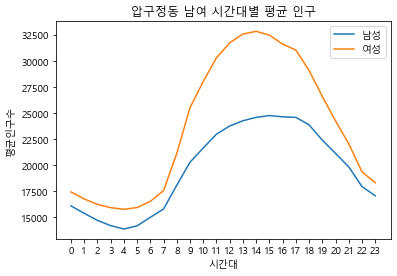

In [18]:
import csv
import matplotlib.pyplot as plt
import datetime

def file_open():
    # 인구 데이터 파일 읽기
    f = open('LOCAL_PEOPLE_DONG_202205.csv', encoding='utf8')
    data = csv.reader(f)
    next(data)
    data = list(data)
    
    # 행정동 코드 파일 읽기
    f2 = open('dong_code.csv', encoding='utf8')
    code_data = csv.reader(f2)
    next(code_data)
    next(code_data)
    code_data = list(code_data)
    
    # 인구 데이터 자료형 변환 (문자열->정수, 실수)
    for row in data:
        for i in range(1, 32):
            if i <= 2:
                row[i] = int(row[i])
            else:
                row[i] = float(row[i])
                
    # 행정동 코드 데이터 자료형 변환 (문자열->정수)
    for row in code_data:
        row[1] = int(row[1])
        
    return data, code_data

# 행정동 이름과 코드 연결
def dong_search(dong_name):
    for row in code_data:
        if row[-1] == dong_name:
            code = row[1]
    print(dong_name, '-', code, '를 분석합니다')
    return code

# 그래프 그리기
def graph_plot(pop_list, label_list, graph_title):
    plt.rc('font', family='Malgun Gothic')
    plt.title(graph_title)
    for i in range(len(pop_list)):
        plt.plot(range(24), pop_list[i], label=label_list[i])
    plt.legend()
    plt.xlabel('시간대')
    plt.ylabel('평균인구수')
    plt.xticks(range(24), range(24))
    plt.show()
    
# 시간대 별 인구 분석
def analysis1(dong_name, dong_code):
    # 행정동의 평균 인구 구하기
    pop = [0 for i in range(24)]
    for row in data:
        if row[2] == dong_code:
            time, p = row[1], row[3]
            pop[time] += p
    pop = [p/31 for p in pop]
    
    # 평균 인구 리스트로 꺾은 선 그래프 작성
    pop = [pop]
    labels = ['평균인구']
    title = dong_name + ' 시간대별 평균 인구'
    graph_plot(pop_list = pop, label_list = labels, graph_title = title)

# 주중/주말 시간대별 인구 분석
def analysis2(dong_name, dong_code):
    weekday = [0 for i in range(24)]
    weekend = [0 for i in range(24)]
    
    for row in data:
        if row[2] == dong_code:
            time, p = row[1], row[3]
            year, mon ,day = int(row[0][:4]), int(row[0][4:6]), int(row[0][6:])
            num = datetime.date(year, mon, day).weekday()
            if num < 5:
                weekday[time] += p
            else:
                weekend[time] += p
                
    weekday_cnt, weekend_cnt = 0, 0
    for i in range(1, 32):
        if datetime.date(2022, 5, i).weekday() < 5:
            weekday_cnt += 1
        else:
            weekend_cnt += 1
            
    weekday = [w/weekday_cnt for w in weekday]
    weekend = [w/weekend_cnt for w in weekend]
    
    # 평균 인구 리스트로 꺾은 선 그래프 작성
    data_set = [weekday, weekend]
    labels = ['주중', '주말']
    title = dong_name + ' 주중/주말 시간대별 평균 인구'
    graph_plot(pop_list=data_set, label_list=labels, graph_title=title)
    
    
# 남여 시간대별 인구 분석
def analysis3(dong_name, dong_code):
    male = [0 for i in range(24)]
    female = [0 for i in range(24)]
    
    for row in data:
        if row[2] == dong_code:
            time = int(row[1])
            male[time] += sum(row[4:18])
            female[time] += sum(row[18:32])
    male = [m/31 for m in male]
    female = [f/31 for f in female]
    
    # 평균 인구 리스트로 꺾은 선 그래프 작성
    data_set = [male, female]
    labels = ['남성', '여성']
    title = dong_name + ' 남여 시간대별 평균 인구'
    graph_plot(pop_list = data_set, label_list=labels, graph_title=title)
    

data, code_data = file_open()

input_name = input('핫플레이스가 위치한 행정동을 입력하세요 >>')
input_code = dong_search(input_name)

analysis3(dong_name = input_name, dong_code = input_code)

핫플레이스가 위치한 행정동을 입력하세요 >>압구정동
압구정동 - 11680545 를 분석합니다
비교할 행정동을 입력하세요 >>역삼2동
역삼2동 - 11680650 를 분석합니다


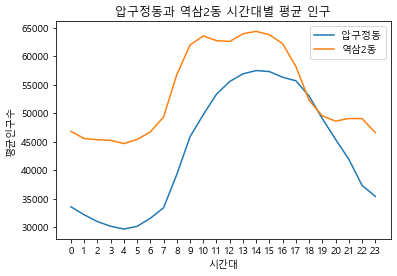

In [22]:
import csv
import matplotlib.pyplot as plt

def file_open():
    # 인구 데이터 파일 읽기
    f = open('LOCAL_PEOPLE_DONG_202205.csv', encoding='utf8')
    data = csv.reader(f)
    next(data)
    data = list(data)
    
    # 행정동 코드 파일 읽기
    f2 = open('dong_code.csv', encoding='utf8')
    code_data = csv.reader(f2)
    next(code_data)
    next(code_data)
    code_data = list(code_data)
    
    # 인구 데이터 자료형 변환 (문자열->정수, 실수)
    for row in data:
        for i in range(1, 32):
            if i <= 2:
                row[i] = int(row[i])
            else:
                row[i] = float(row[i])
                
    # 행정동 코드 데이터 자료형 변환 (문자열->정수)
    for row in code_data:
        row[1] = int(row[1])
        
    return data, code_data

# 행정동 이름과 코드 연결
def dong_search(dong_name):
    for row in code_data:
        if row[-1] == dong_name:
            code = row[1]
    print(dong_name, '-', code, '를 분석합니다')
    return code

# 그래프 그리기
def graph_plot(pop_list, label_list, graph_title):
    plt.rc('font', family='Malgun Gothic')
    plt.title(graph_title)
    for i in range(len(pop_list)):
        plt.plot(range(24), pop_list[i], label=label_list[i])
    plt.legend()
    plt.xlabel('시간대')
    plt.ylabel('평균인구수')
    plt.xticks(range(24), range(24))
    plt.show()
    
# 시간대 별 인구 분석
def analysis1(dong_name, dong_code, graph_yn='y'):
    # 행정동의 평균 인구 구하기
    pop = [0 for i in range(24)]
    for row in data:
        if row[2] == dong_code:
            time, p = row[1], row[3]
            pop[time] += p
    pop = [p/31 for p in pop]
    
    # 그래프를 그리지 않을 시 인구 리스트만 반환 후 종료
    if graph_yn == 'n':
        return pop
    
    # 평균 인구 리스트로 꺾은 선 그래프 작성
    pop = [pop]
    labels = ['평균인구']
    title = dong_name + ' 시간대별 평균 인구'
    graph_plot(pop_list = pop, label_list = labels, graph_title = title)
    
    
# 주중/주말 시간대별 인구 분석
def analysis2(dong_name, dong_code):
    weekday = [0 for i in range(24)]
    weekend = [0 for i in range(24)]
    
    for row in data:
        if row[2] == dong_code:
            time, p = row[1], row[3]
            year, mon ,day = int(row[0][:4]), int(row[0][4:6]), int(row[0][6:])
            num = datetime.date(year, mon, day).weekday()
            if num < 5:
                weekday[time] += p
            else:
                weekend[time] += p
                
    weekday_cnt, weekend_cnt = 0, 0
    for i in range(1, 32):
        if datetime.date(2022, 5, i).weekday() < 5:
            weekday_cnt += 1
        else:
            weekend_cnt += 1
            
    weekday = [w/weekday_cnt for w in weekday]
    weekend = [w/weekend_cnt for w in weekend]
    
    # 평균 인구 리스트로 꺾은 선 그래프 작성
    data_set = [weekday, weekend]
    labels = ['주중', '주말']
    title = dong_name + ' 주중/주말 시간대별 평균 인구'
    graph_plot(pop_list=data_set, label_list=labels, graph_title=title)
    
    
# 남여 시간대별 인구 분석
def analysis3(dong_name, dong_code):
    male = [0 for i in range(24)]
    female = [0 for i in range(24)]
    
    for row in data:
        if row[2] == dong_code:
            time = int(row[1])
            male[time] += sum(row[4:18])
            female[time] += sum(row[18:32])
    male = [m/31 for m in male]
    female = [f/31 for f in female]
    
    # 평균 인구 리스트로 꺾은 선 그래프 작성
    data_set = [male, female]
    labels = ['남성', '여성']
    title = dong_name + ' 남여 시간대별 평균 인구'
    graph_plot(pop_list = data_set, label_list=labels, graph_title=title)
    

# 다른 지역과 인구 비교 분석
def analysis4(dong_name1, dong_code1):
    dong_name2 = input('비교할 행정동을 입력하세요 >>')
    dong_code2 = dong_search(dong_name2)
    
    pop1 = analysis1(dong_name = dong_name1, dong_code = dong_code1, graph_yn = 'n')
    pop2 = analysis1(dong_name = dong_name2, dong_code = dong_code2, graph_yn = 'n')
    
    # 평균 인구 리스트로 꺾은 선 그래프 작성
    data_set = [pop1, pop2]
    labels = [dong_name1, dong_name2]
    title = dong_name1 + '과 ' + dong_name2 + ' 시간대별 평균 인구'
    graph_plot(pop_list = data_set, label_list=labels, graph_title=title)
    

data, code_data = file_open()

input_name = input('핫플레이스가 위치한 행정동을 입력하세요 >>')
input_code = dong_search(input_name)

analysis4(dong_name1 = input_name, dong_code1 = input_code)

핫플레이스는 언제 가야 가장 덜 붐빌까?
핫플레이스가 위치한 행정동을 입력하세요 >>여의동
여의동 - 11560540 를 분석합니다
1. 시간대별 평균인구는 어떻게 될까?
2. 주중에 가야 할까? 주말에 가야 할까
3. 남성이 많을까? 여성이 많을까?
4. 나에게 익숙한 지역과 비교해 얼마나 붐빌까?
분석하고 싶은 번호 입력>>3


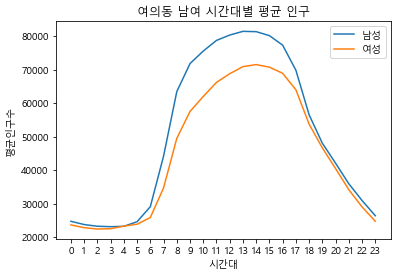

In [23]:
import csv
import matplotlib.pyplot as plt

def file_open():
    # 인구 데이터 파일 읽기
    f = open('LOCAL_PEOPLE_DONG_202205.csv', encoding='utf8')
    data = csv.reader(f)
    next(data)
    data = list(data)
    
    # 행정동 코드 파일 읽기
    f2 = open('dong_code.csv', encoding='utf8')
    code_data = csv.reader(f2)
    next(code_data)
    next(code_data)
    code_data = list(code_data)
    
    # 인구 데이터 자료형 변환 (문자열->정수, 실수)
    for row in data:
        for i in range(1, 32):
            if i <= 2:
                row[i] = int(row[i])
            else:
                row[i] = float(row[i])
                
    # 행정동 코드 데이터 자료형 변환 (문자열->정수)
    for row in code_data:
        row[1] = int(row[1])
        
    return data, code_data

# 행정동 이름과 코드 연결
def dong_search(dong_name):
    for row in code_data:
        if row[-1] == dong_name:
            code = row[1]
    print(dong_name, '-', code, '를 분석합니다')
    return code

# 그래프 그리기
def graph_plot(pop_list, label_list, graph_title):
    plt.rc('font', family='Malgun Gothic')
    plt.title(graph_title)
    for i in range(len(pop_list)):
        plt.plot(range(24), pop_list[i], label=label_list[i])
    plt.legend()
    plt.xlabel('시간대')
    plt.ylabel('평균인구수')
    plt.xticks(range(24), range(24))
    plt.show()
    
# 시간대 별 인구 분석
def analysis1(dong_name, dong_code, graph_yn='y'):
    # 행정동의 평균 인구 구하기
    pop = [0 for i in range(24)]
    for row in data:
        if row[2] == dong_code:
            time, p = row[1], row[3]
            pop[time] += p
    pop = [p/31 for p in pop]
    
    # 그래프를 그리지 않을 시 인구 리스트만 반환 후 종료
    if graph_yn == 'n':
        return pop
    
    # 평균 인구 리스트로 꺾은 선 그래프 작성
    pop = [pop]
    labels = ['평균인구']
    title = dong_name + ' 시간대별 평균 인구'
    graph_plot(pop_list = pop, label_list = labels, graph_title = title)
    
    
# 주중/주말 시간대별 인구 분석
def analysis2(dong_name, dong_code):
    weekday = [0 for i in range(24)]
    weekend = [0 for i in range(24)]
    
    for row in data:
        if row[2] == dong_code:
            time, p = row[1], row[3]
            year, mon ,day = int(row[0][:4]), int(row[0][4:6]), int(row[0][6:])
            num = datetime.date(year, mon, day).weekday()
            if num < 5:
                weekday[time] += p
            else:
                weekend[time] += p
                
    weekday_cnt, weekend_cnt = 0, 0
    for i in range(1, 32):
        if datetime.date(2022, 5, i).weekday() < 5:
            weekday_cnt += 1
        else:
            weekend_cnt += 1
            
    weekday = [w/weekday_cnt for w in weekday]
    weekend = [w/weekend_cnt for w in weekend]
    
    # 평균 인구 리스트로 꺾은 선 그래프 작성
    data_set = [weekday, weekend]
    labels = ['주중', '주말']
    title = dong_name + ' 주중/주말 시간대별 평균 인구'
    graph_plot(pop_list=data_set, label_list=labels, graph_title=title)
    
    
# 남여 시간대별 인구 분석
def analysis3(dong_name, dong_code):
    male = [0 for i in range(24)]
    female = [0 for i in range(24)]
    
    for row in data:
        if row[2] == dong_code:
            time = int(row[1])
            male[time] += sum(row[4:18])
            female[time] += sum(row[18:32])
    male = [m/31 for m in male]
    female = [f/31 for f in female]
    
    # 평균 인구 리스트로 꺾은 선 그래프 작성
    data_set = [male, female]
    labels = ['남성', '여성']
    title = dong_name + ' 남여 시간대별 평균 인구'
    graph_plot(pop_list = data_set, label_list=labels, graph_title=title)
    

# 다른 지역과 인구 비교 분석
def analysis4(dong_name1, dong_code1):
    dong_name2 = input('비교할 행정동을 입력하세요 >>')
    dong_code2 = dong_search(dong_name2)
    
    pop1 = analysis1(dong_name = dong_name1, dong_code = dong_code1, graph_yn = 'n')
    pop2 = analysis1(dong_name = dong_name2, dong_code = dong_code2, graph_yn = 'n')
    
    # 평균 인구 리스트로 꺾은 선 그래프 작성
    data_set = [pop1, pop2]
    labels = [dong_name1, dong_name2]
    title = dong_name1 + '과 ' + dong_name2 + ' 시간대별 평균 인구'
    graph_plot(pop_list = data_set, label_list=labels, graph_title=title)
    

data, code_data = file_open()

print('핫플레이스는 언제 가야 가장 덜 붐빌까?')

input_name = input('핫플레이스가 위치한 행정동을 입력하세요 >>')
input_code = dong_search(input_name)

print('1. 시간대별 평균인구는 어떻게 될까?')
print('2. 주중에 가야 할까? 주말에 가야 할까')
print('3. 남성이 많을까? 여성이 많을까?')
print('4. 나에게 익숙한 지역과 비교해 얼마나 붐빌까?')

selection = int(input('분석하고 싶은 번호 입력>>'))
if selection == 1:
    analysis1(dong_name = input_name, dong_code = input_code)
elif selection == 2:
    analysis2(dong_name = input_name, dong_code = input_code)
elif selection == 3:
    analysis3(dong_name = input_name, dong_code = input_code)
elif selection == 4:
    analysis4(dong_name1 = input_name, dong_code1 = input_code)
else:
    print('잘못된 입력입니다.')
    

# Self Check

In [29]:
#실습1번
def gugudan(num):
    for i in range(1, 10):
        print(num, ' x ', i, ' = ', num*i)
        
dan = int(input('단을 입력하세요>>'))
gugudan(dan)

단을 입력하세요>>9
9  x  1  =  9
9  x  2  =  18
9  x  3  =  27
9  x  4  =  36
9  x  5  =  45
9  x  6  =  54
9  x  7  =  63
9  x  8  =  72
9  x  9  =  81


In [32]:
#실습2번
def gugudan():
    for i in range(2, 10):
        print(i,'단 -------------')
        for j in range(1, 10):
            print(i, ' x ', j, ' = ', i*j)
        
gugudan()

2 단 -------------
2  x  1  =  2
2  x  2  =  4
2  x  3  =  6
2  x  4  =  8
2  x  5  =  10
2  x  6  =  12
2  x  7  =  14
2  x  8  =  16
2  x  9  =  18
3 단 -------------
3  x  1  =  3
3  x  2  =  6
3  x  3  =  9
3  x  4  =  12
3  x  5  =  15
3  x  6  =  18
3  x  7  =  21
3  x  8  =  24
3  x  9  =  27
4 단 -------------
4  x  1  =  4
4  x  2  =  8
4  x  3  =  12
4  x  4  =  16
4  x  5  =  20
4  x  6  =  24
4  x  7  =  28
4  x  8  =  32
4  x  9  =  36
5 단 -------------
5  x  1  =  5
5  x  2  =  10
5  x  3  =  15
5  x  4  =  20
5  x  5  =  25
5  x  6  =  30
5  x  7  =  35
5  x  8  =  40
5  x  9  =  45
6 단 -------------
6  x  1  =  6
6  x  2  =  12
6  x  3  =  18
6  x  4  =  24
6  x  5  =  30
6  x  6  =  36
6  x  7  =  42
6  x  8  =  48
6  x  9  =  54
7 단 -------------
7  x  1  =  7
7  x  2  =  14
7  x  3  =  21
7  x  4  =  28
7  x  5  =  35
7  x  6  =  42
7  x  7  =  49
7  x  8  =  56
7  x  9  =  63
8 단 -------------
8  x  1  =  8
8  x  2  =  16
8  x  3  =  24
8  x  4  =  32
8  x  5  =  40
8 

In [33]:
#실습3번
def cal_grade(grade):
    if grade >= 80:
        result = 'A'
    elif grade >= 40:
        result = 'B'
    else:
        result = 'C'
    return result
    
s = int(input('점수 : '))
print('등급 : ', cal_grade(s))

점수 : 85
등급 :  A
